# <font color = #EE4000> G2M Insight For Cab Investment Firm

## <font color = 		#03A89E	> Part 1: </font> <font color = 	#7B68EE	> Import Libraries and settings </font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date
import string
from scipy import stats 
import scipy.stats as stat
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)


## <font color =        #03A89E > Part 2: </font> <font color =     #7B68EE > Import Datasets</font>


In [2]:
df_cab=pd.read_csv("Cab_Data.csv")
df_customer_id=pd.read_csv("Customer_ID.csv")
df_transaction_id=pd.read_csv("Transaction_ID.csv")
df_city=pd.read_csv("City.csv")

In [3]:
data_sets=[df_cab,df_customer_id,df_transaction_id,df_city]
data_set_name=["df_Cab","df_Custome_ID","df_Transaction_ID","df_City"]

## <font color =        #03A89E > Part 3: </font> <font color =     #7B68EE > First contact with data</font>
### <font color = #7B68EE> Columns Name Operations

In [4]:
for data in data_sets:
    data.columns=data.columns.str.replace(" ","_")
    data.columns=data.columns.str.lower()

### <font color = #7B68EE> Duplicated and Missing Values Check

In [5]:
for data in data_sets:
    data=data.drop_duplicates(keep="first")

In [6]:
for data in data_sets:
    a=data.isnull().sum()
    print("*"*30)
    print(a)
    print("*"*30)

******************************
transaction_id    0
date_of_travel    0
company           0
city              0
km_travelled      0
price_charged     0
cost_of_trip      0
dtype: int64
******************************
******************************
customer_id           0
gender                0
age                   0
income_(usd/month)    0
dtype: int64
******************************
******************************
transaction_id    0
customer_id       0
payment_mode      0
dtype: int64
******************************
******************************
city          0
population    0
users         0
dtype: int64
******************************


### <font color = #7B68EE> Dtypes Selection

In [7]:
for data in data_sets:
    objects=data.select_dtypes(["object"]).columns                                      
    for column in objects:
        calculation=(len(data[column])-data[column].nunique())/len(data[column])*100   #If the difference of uniq values from the data set is greater than 90 percent, we should qualify it as Categorical.
        if calculation>90 :
             data[column]=data[column].astype("category")

### <font color = #7B68EE>  First information about datasets

In [8]:
for data in data_sets:
    data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   transaction_id  359392 non-null  int64   
 1   date_of_travel  359392 non-null  int64   
 2   company         359392 non-null  category
 3   city            359392 non-null  category
 4   km_travelled    359392 non-null  float64 
 5   price_charged   359392 non-null  float64 
 6   cost_of_trip    359392 non-null  float64 
dtypes: category(2), float64(3), int64(2)
memory usage: 14.4 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   customer_id         49171 non-null  int64   
 1   gender              49171 non-null  category
 2   age                 49171 non-null  int64   
 3   income_(usd/month)  49171 non-null  int6

### <font color = #7B68EE>  Cab Dataset operations

In [9]:
df_cab.head(9)

,transaction_id,date_of_travel,company,city,km_travelled,price_charged,cost_of_trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776
5,10000016,42376,Pink Cab,ATLANTA GA,6.06,72.43,63.024
6,10000017,42372,Pink Cab,AUSTIN TX,44.00,576.15,475.200
7,10000018,42376,Pink Cab,AUSTIN TX,35.65,466.10,377.890
8,10000019,42381,Pink Cab,BOSTON MA,14.40,191.61,146.880


### <font color = #7B68EE> Converting date column to date format

In [10]:
min_date=df_cab["date_of_travel"].min()            #it has to represent  31/01/2016

base_date=date.fromordinal(datetime(2016,1,31).toordinal()-min_date)
print("Minimum date of data: ",min_date)
print("The base of the date :",base_date)

Minimum date of data:  42371
The base of the date : 1900-01-28


In [11]:
def convert_date(X):
    to_strp=date.fromordinal(base_date.toordinal()+X).strftime("%d-%m-%Y")
    return datetime.strptime(to_strp,"%d-%m-%Y")

In [12]:
df_cab["date_of_travel"]=df_cab["date_of_travel"].apply(convert_date)
df_cab.date_of_travel.head()

0   2016-02-06
1   2016-02-04
2   2016-01-31
3   2016-02-05
4   2016-02-01
Name: date_of_travel, dtype: datetime64[ns]

In [13]:
print("Rows: ",df_cab.shape[0])
print("Columns: ",df_cab.shape[1])

Rows:  359392
Columns:  7


In [14]:
df_cab.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_id,359392.0,1.022076e+07,126805.803715,10000011.0,1.011081e+07,10221035.50,1.033094e+07,10440107.00
km_travelled,359392.0,2.256725e+01,12.233526,1.9,1.200000e+01,22.44,3.296000e+01,48.00
price_charged,359392.0,4.234433e+02,274.378911,15.6,2.064375e+02,386.36,5.836600e+02,2048.03
cost_of_trip,359392.0,2.861901e+02,157.993661,19.0,1.512000e+02,282.48,4.136832e+02,691.20


### <font color = #7B68EE> Customer dataset operations

In [15]:
df_customer_id.head()

,customer_id,gender,age,income_(usd/month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [16]:
print("Rows: ",df_customer_id.shape[0])
print("Columns: ",df_customer_id.shape[1])

Rows:  49171
Columns:  4


In [17]:
df_customer_id.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,49171.0,28398.252283,17714.137333,1.0,12654.5,27631.0,43284.5,60000.0
age,49171.0,35.363121,12.599066,18.0,25.0,33.0,42.0,65.0
income_(usd/month),49171.0,15015.631856,8002.208253,2000.0,8289.5,14656.0,21035.0,35000.0


### <font color = #7B68EE> Transaction dataset operations

In [18]:
df_transaction_id.head()

,transaction_id,customer_id,payment_mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [19]:
print("Rows: ",df_transaction_id.shape[0])
print("Columns: ",df_transaction_id.shape[1])

Rows:  440098
Columns:  3


### <font color = #7B68EE> City dataset operations

In [20]:
df_city

,city,population,users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [21]:
print("Rows: ",df_city.shape[0])
print("Columns: ",df_city.shape[1])

Rows:  20
Columns:  3


In [22]:
def convert_int(x):
    return x.replace(",","")

In [23]:
df_city["population"] = pd.to_numeric(df_city["population"].apply(convert_int))
df_city["users"]=pd.to_numeric(df_city["users"].apply(convert_int))

## <font color =        #03A89E > Part 4: </font> <font color =     #7B68EE > Merge Operation and Field/feature transformations
</font>

In [24]:
df_Cab_copy=df_cab.copy()

df_City_copy=df_city.copy()

df_Customer_ID_copy=df_customer_id.copy()

df_Transaction_ID_copy=df_transaction_id.copy()

In [25]:
df=df_cab.merge(df_transaction_id,on="transaction_id").merge(df_customer_id,on="customer_id",how="left").merge(df_city,on="city",how="left")

In [26]:
print("Rows: ", df.shape[0])
print("Columns: ",df.shape[1])

Rows:  359392
Columns:  14


In [27]:
df.isna().sum()

transaction_id        0
date_of_travel        0
company               0
city                  0
km_travelled          0
price_charged         0
cost_of_trip          0
customer_id           0
payment_mode          0
gender                0
age                   0
income_(usd/month)    0
population            0
users                 0
dtype: int64

In [28]:
df["year"]=df["date_of_travel"].dt.year
df["month"]=df["date_of_travel"].dt.month
df["day"]=df["date_of_travel"].dt.day
df["days_of_week"]=df.date_of_travel.apply(lambda x : datetime.strftime(x,'%A'))

### <font color = #7B68EE> İmporting Holiday data and Merge to Master Data

In [29]:
holiday=pd.read_csv("US Holiday Dates (2004-2021).csv")
holiday.drop(columns=["WeekDay","Month","Day","Year"],axis=1,inplace=True)

In [68]:
holiday.shape

(342, 3)

In [31]:
holiday["Date"]=pd.to_datetime(holiday["Date"])
holiday["date_of_holiday"]=holiday["Date"]

In [32]:
df=df.merge(holiday,left_on="date_of_travel",right_on="date_of_holiday",how="left")
df.drop(["date_of_holiday","Date"],axis=1,inplace=True)
df["Holiday"]=df["Holiday"].notnull()

In [33]:
Weekend_Weekday={"Saturday":"Weekend",'Thursday':"Weekday", 'Sunday':"Weekend", 'Friday':"Weekday", 'Monday':"Weekday", 'Wednesday':"Weekday",
       'Tuesday':"Weekday"}

In [34]:
Weekend_Weekday={"Saturday":"Weekend",'Thursday':"Weekday", 'Sunday':"Weekend", 'Friday':"Weekday", 'Monday':"Weekday", 'Wednesday':"Weekday",'Tuesday':"Weekday"}
df["day_status"]=df["days_of_week"]
df["day_status"]=df["day_status"].map(Weekend_Weekday)

In [35]:
season_month_north = {
            12:'Winter', 1:'Winter', 2:'Winter',
            3:'Spring', 4:'Spring', 5:'Spring',
            6:'Summer', 7:'Summer', 8:'Summer',
            9:'Autumn', 10:'Autumn', 11:'Autumn'}
    
df["season"]=df["month"].map(season_month_north)

In [36]:
def city_split(x):
    if len(x.split()[-1])<3:
        return  x.split()[-1]

In [37]:
df["teritory"]=df["city"].apply(city_split)

In [38]:
def city_rename(x):
    if len(x.split()[-1])<3 :
        return  " ".join(x.split()[0:-1])
    else :
        return x

In [39]:
df["teritory"]=df["city"].apply(city_split)
df["city"]=df["city"].apply(city_rename)
df.teritory=df.teritory.fillna("CA")

### <font color = #7B68EE> importing Land square of Us dataset

In [40]:
df_us_land_square_raw=pd.read_html("https://en.wikipedia.org/wiki/List_of_United_States_cities_by_area")[1]

In [67]:
df_us_land_square_raw.head() 

,Rank,City,State,Land area (sq mi),Land area (km2),Water area (sq mi),Water area (km2),Total area (sq mi),Total area (km2),Population (2020)[2]
0,1,Sitka,Alaska,2870.1,7434,1945.1,5038.0,4815.1,12471,8458
1,2,Juneau,Alaska,2704.0,7003,550.7,1426.0,3254.7,8430,32255
2,3,Wrangell,Alaska,2556.0,6620,920.6,2384.0,3476.6,9004,2127
3,4,Anchorage,Alaska,1706.8,4421,239.9,621.0,1946.7,5042,291247
4,5,Tribune [note 1]*,Kansas,778.2,2016,0.0,0.0,778.2,2016,1182


##### <font color =  #950CDF> String operations to merging data

In [42]:
df_land_area=df_us_land_square_raw[["City","Land area (km2)"]]
df_land_area["City"]=df_land_area["City"].apply(lambda x: x.upper())
df_land_area["City"]=df_land_area["City"].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)).translate(str.maketrans('', '', string.digits)).replace(" NOTE ","").strip(" "))
df_land_area["City"]=df_land_area["City"].apply(lambda x: x.replace(" CITY",""))

In [43]:
df=df.merge(df_land_area,right_on="City",left_on="city",how="left")
df.drop("City",axis=1,inplace=True)

In [44]:
df.isnull().sum()

transaction_id            0
date_of_travel            0
company                   0
city                      0
km_travelled              0
price_charged             0
cost_of_trip              0
customer_id               0
payment_mode              0
gender                    0
age                       0
income_(usd/month)        0
population                0
users                     0
year                      0
month                     0
day                       0
days_of_week              0
Holiday                   0
day_status                0
season                    0
teritory                  0
Land area (km2)       93737
dtype: int64

In [45]:
#There are some missing values about cities.Filling them with the values below
missing_city={'WASHINGTON':177  , 'BOSTON': 232, 'SILICON VALLEY': 4801, 'MIAMI': 143, 'ORANGE COUNTY':2048,
       'PITTSBURGH':151.1,"SAN FRANCISCO" : 121}

In [46]:
df["Land area (km2)"]=df["Land area (km2)"].mask(df["Land area (km2)"].isna(),df["city"],axis=0)
#Function for missing value
def missing_lands(x):
    for key,value in missing_city.items():
        if key==x:
            return value
    else:
        return x
    
df["Land area (km2)"]=df["Land area (km2)"].apply(missing_lands)

In [47]:
df.isna().sum().sum()

0

### <font color = #7B68EE> Creating New Columns

In [48]:
def mapping_age(age):
    if age > 18 and age <= 25 :
        return "18-25"
    elif age > 25 and age <= 40 :
        return "25-40"
    elif age > 40 and age < 60  :
        return "40-60"
    else:
        return "60+"



def mapping_income(income):
    if income <= 2500:
        return "low-class"
    elif income > 2500 and income <= 15000 :
        return "middle-class"
    else:
        return "high-class"


In [49]:
df["population_density"]=df["population"]/df["Land area (km2)"]
df["users_density"]=df["users"]/df["Land area (km2)"]
df["user_frequency"]=df["population"]-df["users"]
df["profit"]=df["price_charged"]-df["cost_of_trip"]
df["profit_margin"]=(df["price_charged"]-df["cost_of_trip"])/df["cost_of_trip"]
df["profit_margin_per_km"]=df["profit_margin"]/df["km_travelled"]
df["profit_per_km"]=df["profit"]/df["km_travelled"]
df["cost_per_km"]=df["cost_of_trip"]/df["km_travelled"]
df["price_charged_per_km"]=df["price_charged"]/df["km_travelled"]
df['profit_percentage_per_trip'] = ((df['profit'] / df['cost_of_trip'])*100).round(2)
df["profit_margin_per_km"]=df["profit_margin"]/df["km_travelled"]**2
df["age_summary"] = df["age"].transform(mapping_age)
df["income_summary"] = df["income_(usd/month)"].transform(mapping_income)

In [50]:
df.columns=df.columns.str.replace(" ","_")
df.columns=df.columns.str.lower()

In [51]:
df.describe().apply(lambda x: x.round(3)).drop(["transaction_id","customer_id"],axis=1).T

,count,mean,std,min,25%,50%,75%,max
km_travelled,359571.0,22.568,12.234,1.900,12.000,22.440,32.960,48.000
price_charged,359571.0,423.458,274.395,15.600,206.480,386.380,583.660,2048.030
cost_of_trip,359571.0,286.194,157.997,19.000,151.200,282.480,413.683,691.200
age,359571.0,35.337,12.594,18.000,25.000,33.000,42.000,65.000
income_(usd/month),359571.0,15048.613,7969.366,2000.000,8424.000,14685.000,21035.000,35000.000
population,359571.0,3132069.970,3315102.248,248968.000,671238.000,1595037.000,8405837.000,8405837.000
users,359571.0,158363.566,100847.376,3643.000,80021.000,144132.000,302149.000,302149.000
year,359571.0,2017.167,0.861,2016.000,2016.000,2017.000,2018.000,2019.000
month,359571.0,6.985,3.742,1.000,4.000,8.000,10.000,12.000
day,359571.0,15.603,8.849,1.000,8.000,16.000,23.000,31.000


## <font color =        #03A89E > Part 5: </font> <font color =     #7B68EE > Explorotory Data Analysis</font>

In [52]:
df.head(4)

,transaction_id,date_of_travel,company,city,km_travelled,price_charged,cost_of_trip,customer_id,payment_mode,gender,age,income_(usd/month),population,users,year,month,day,days_of_week,holiday,day_status,season,teritory,land_area_(km2),population_density,users_density,user_frequency,profit,profit_margin,profit_margin_per_km,profit_per_km,cost_per_km,price_charged_per_km,profit_percentage_per_trip,age_summary,income_summary
0,10000011,2016-02-06,Pink Cab,ATLANTA,30.45,370.95,313.635,29290,Card,Male,28,10813,814885,24701,2016,2,6,Saturday,False,Weekend,Winter,GA,350.0,2328.242857,70.574286,790184,57.315,0.182744,0.000197,1.882266,10.3,12.182266,18.27,25-40,middle-class
1,10000012,2016-02-04,Pink Cab,ATLANTA,28.62,358.52,334.854,27703,Card,Male,27,9237,814885,24701,2016,2,4,Thursday,False,Weekday,Winter,GA,350.0,2328.242857,70.574286,790184,23.666,0.070676,0.000086,0.826904,11.7,12.526904,7.07,25-40,middle-class
2,10000013,2016-01-31,Pink Cab,ATLANTA,9.04,125.20,97.632,28712,Cash,Male,53,11242,814885,24701,2016,1,31,Sunday,False,Weekend,Winter,GA,350.0,2328.242857,70.574286,790184,27.568,0.282366,0.003455,3.049558,10.8,13.849558,28.24,40-60,middle-class
3,10000014,2016-02-05,Pink Cab,ATLANTA,33.17,377.40,351.602,28020,Cash,Male,23,23327,814885,24701,2016,2,5,Friday,False,Weekday,Winter,GA,350.0,2328.242857,70.574286,790184,25.798,0.073373,0.000067,0.777751,10.6,11.377751,7.34,18-25,high-class


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359571 entries, 0 to 359570
Data columns (total 35 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   transaction_id              359571 non-null  int64         
 1   date_of_travel              359571 non-null  datetime64[ns]
 2   company                     359571 non-null  category      
 3   city                        359571 non-null  object        
 4   km_travelled                359571 non-null  float64       
 5   price_charged               359571 non-null  float64       
 6   cost_of_trip                359571 non-null  float64       
 7   customer_id                 359571 non-null  int64         
 8   payment_mode                359571 non-null  category      
 9   gender                      359571 non-null  category      
 10  age                         359571 non-null  int64         
 11  income_(usd/month)          359571 non-

### <font color = #7B68EE> Investigate about Profit

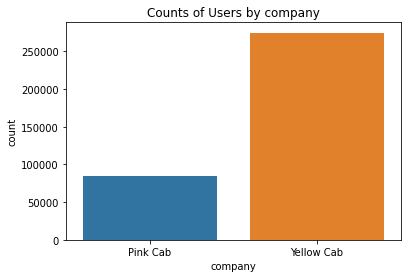

In [54]:
sns.countplot(x="company",data=df);
plt.title("Counts of Users by company");

Yellow Cab has more user.

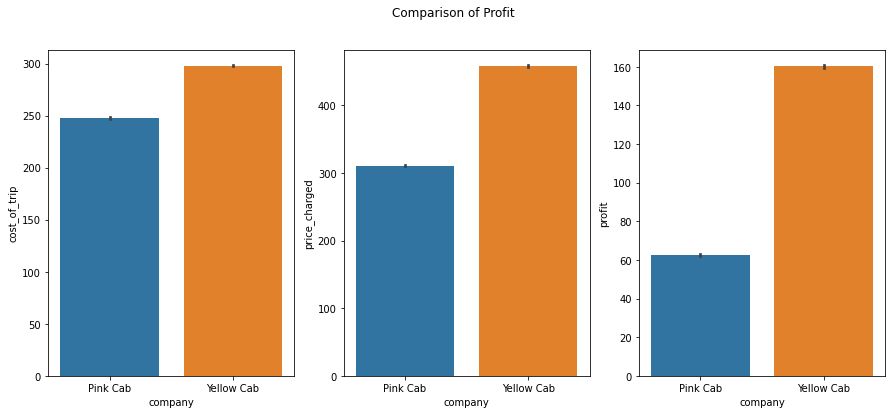

In [55]:
fig,axes = plt.subplots(1, 3, figsize=(15,6), sharey=False)
fig.suptitle("Comparison of Profit")
sns.barplot(ax=axes[0], data=df , y="cost_of_trip" , x="company")
sns.barplot(ax=axes[1], data=df , y="price_charged" ,x="company")
sns.barplot(ax=axes[2], data=df , y="profit" ,  x="company");

Yellow Cab seems much more profitable instead of pink cab

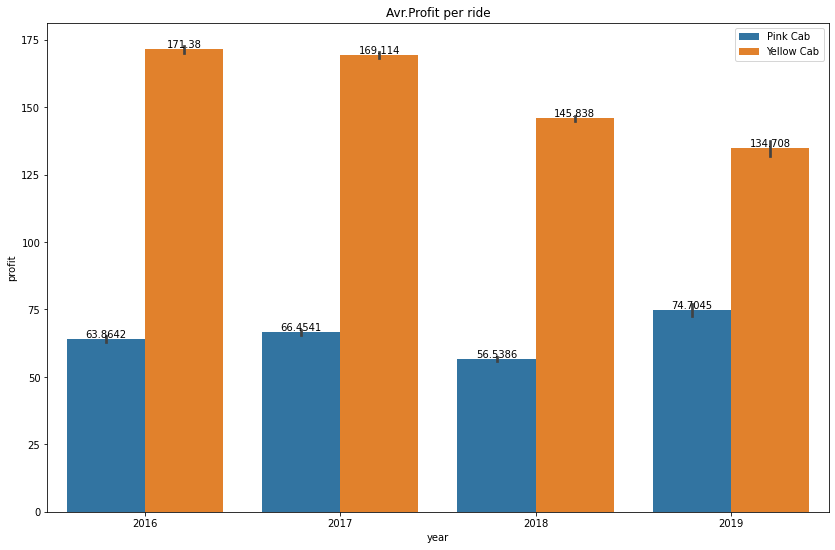

In [56]:
plt.figure(figsize=(14,9))
ax=plt.subplot()
ax = sns.barplot(data=df, x="year" , y="profit",hue="company")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.legend();
ax.set_title("Avr.Profit per ride");

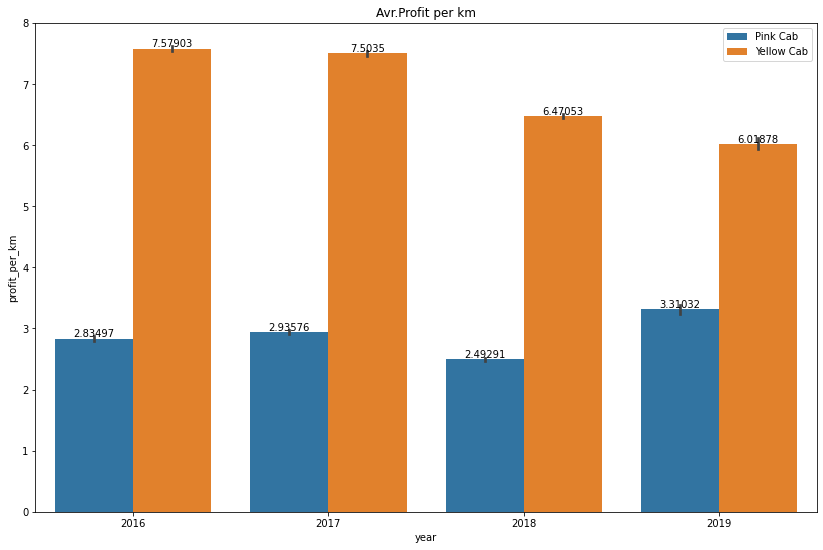

In [57]:
plt.figure(figsize=(14,9))
ax=plt.subplot()
ax = sns.barplot(data=df, x="year" , y="profit_per_km",hue="company")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.legend();
ax.set_title("Avr.Profit per km");

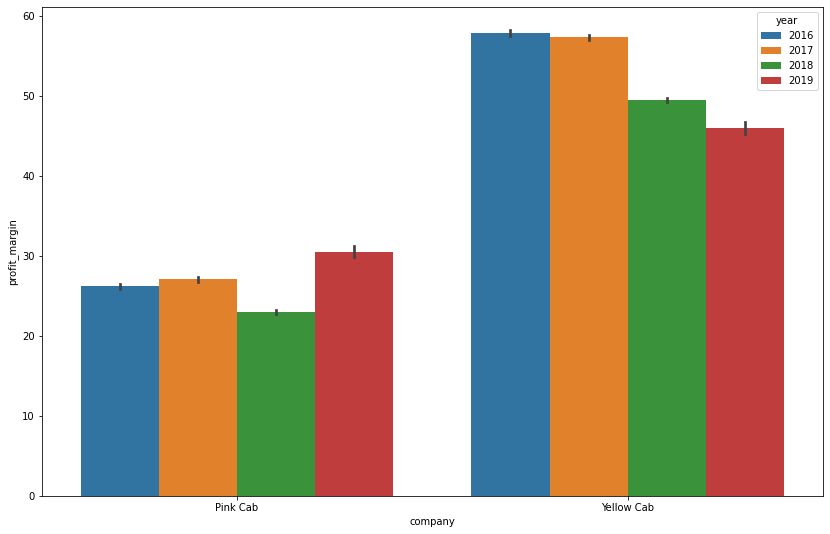

In [58]:
plt.figure(figsize=(14,9))
sns.barplot(y=df["profit_margin"]*100,x="company",hue="year",data=df,);

We should ignore years of 2019 when investigating. Because of the lack of observations

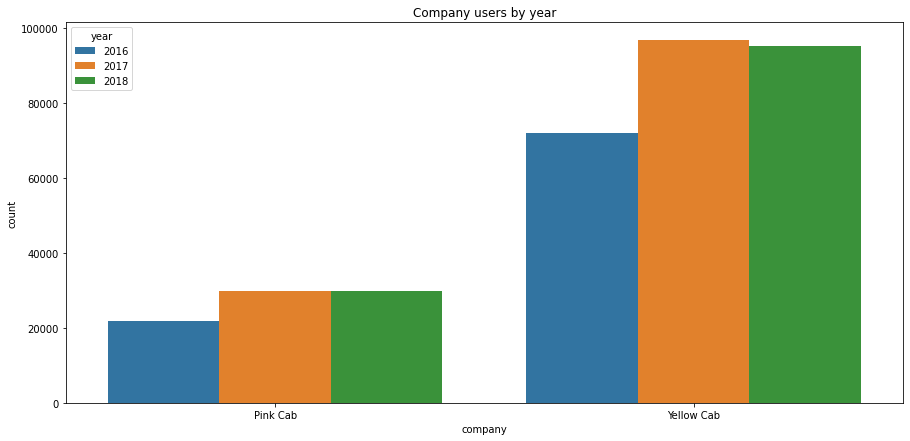

In [59]:
plt.figure(figsize=(15,7))
sns.countplot(x="company",hue="year",data=df[df["year"]!=2019]);
plt.title("Company users by year");

In [60]:
pink_df=df[df["company"]=="Pink Cab"]
yellow_df=df[df["company"]=="Yellow Cab"]

In [61]:
profitable_pink=pink_df[pink_df["profit"]>0].groupby("city").count()/(pink_df.groupby("city").count())*100
profitable_yellow=yellow_df[yellow_df["profit"]>0].groupby("city").count()/(yellow_df.groupby("city").count())*100

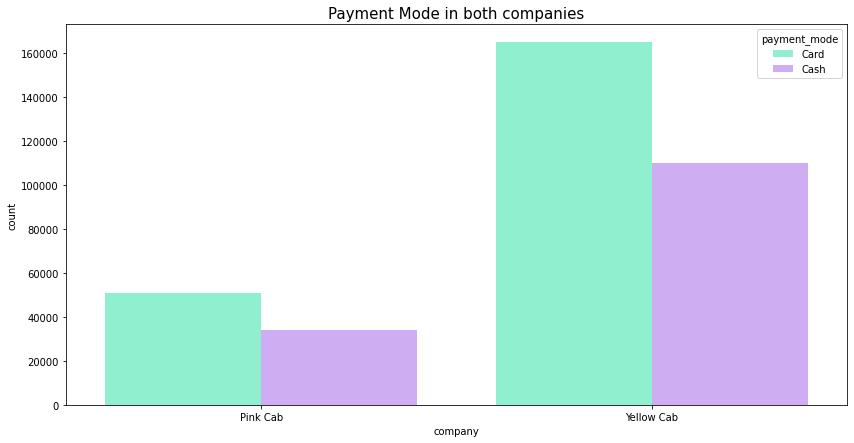

In [62]:
plt.figure(figsize=(14,7))
sns.countplot(x="company", hue="payment_mode", data=df, palette=['#7FFFD4',"#cea2fd"])
plt.title('Payment Mode in both companies', fontsize=15);

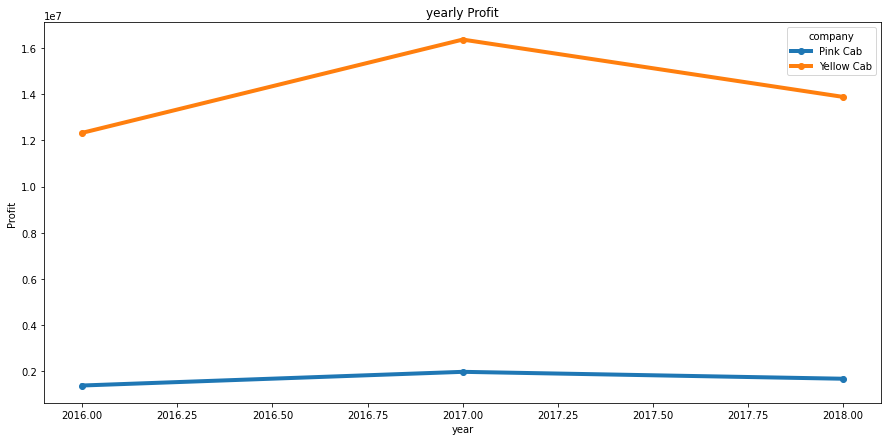

In [63]:
fig, ax = plt.subplots(figsize=(15, 7))
df[df["year"]!=2019].groupby(["year","company"]).sum()["profit"].unstack().plot(ax=ax, title="yearly Profit", ylabel="Profit", lw=4,marker='o');

Yellow Cab has more profit than Pink one by yearly

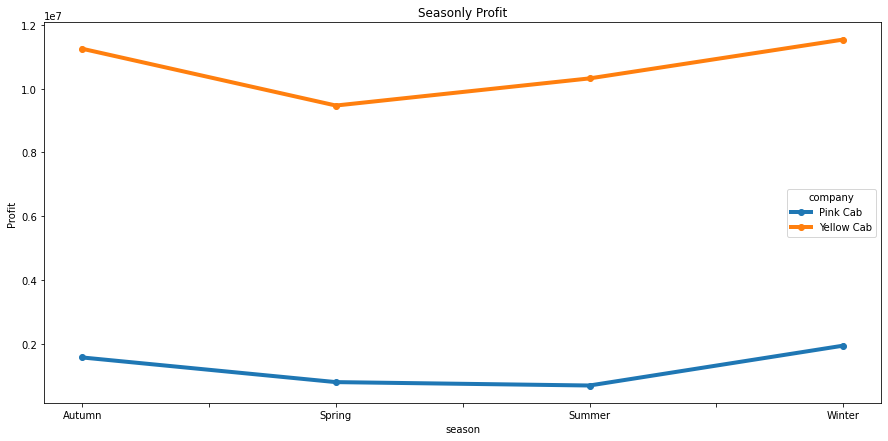

In [64]:
fig, ax = plt.subplots(figsize=(15, 7))
df[df["year"]!=2019].groupby(["season","company"]).sum()["profit"].unstack().plot(ax=ax, title="Seasonly Profit", ylabel="Profit", lw=4,marker='o');

NameError: name 'profitble_pink' is not defined

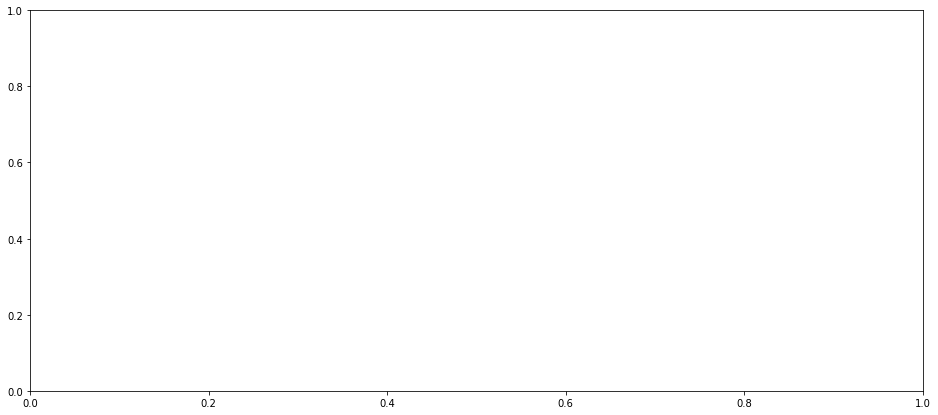

In [65]:
fig, ax = plt.subplots(figsize=(16, 7))
profitble_pink["transaction_id"].plot(ax=ax,kind="barh",color="#f05131",width=0.6);

In [ ]:
fig, ax = plt.subplots(figsize=(16, 7))
profitble_yellow["transaction_id"].plot(ax=ax,kind="barh",color="yellow",width=0.6);

In [ ]:
plt.figure(figsize=(16,9))
sns.barplot(y="profit",x="city",hue="company",data=df)
plt.xticks(rotation=90);

In [ ]:
cor_df=df.drop(["transaction_id","customer_id","user_frequency","cost_per_km","profit_per_km","profit_percentage_per_trip","price_charged_per_km","profit_margin_per_km"],axis=1)

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(cor_df.corr(), square=True,annot=True,cmap="Pastel1");

#Too much corelation between km and cost as we expect

In [ ]:
df.groupby(["income_summary","company"]).sum()["profit"].plot(kind="bar",figsize=(16,7),color=["pink","yellow","red","blue","black","green"])
plt.title("Profit by income Level");

In [ ]:
cat_df=df.select_dtypes(["category"])

### <font color = #7B68EE> Frequency of variables

In [ ]:
for column in cat_df.columns:
    plt.figure()
    sns.countplot(x=column,data=cat_df)
    if cat_df[column].nunique()>8:
        plt.xticks(rotation=90)
   
    plt.xlabel(column)
    plt.title("Class frequancey of {} variable".format(column))

### <font color = #7B68EE> Checking continous variables

In [ ]:
(sns
 .FacetGrid(df,row="gender",col="payment_mode",
               hue="company",
               height=7)
 .map(sns.kdeplot,"km_travelled", shade=True)
 .add_legend()
);
               

In [ ]:
(sns
 .FacetGrid(df,row="gender",col="payment_mode",
               hue="company",
               height=7)
 .map(sns.kdeplot,"price_charged", shade=True)
 .add_legend()
);
               

In [ ]:
(sns
 .FacetGrid(df,row="gender",col="payment_mode",
               hue="company",
               height=7)
 .map(sns.kdeplot,"profit", shade=True)
 .add_legend()
);
               

In [ ]:
(sns
 .FacetGrid(df,row="holiday",col="payment_mode",
               hue="company",
               height=7)
 .map(sns.kdeplot,"price_charged", shade=True)
 .add_legend()
);
               

In [ ]:
plt.figure(figsize=(13,6))
sns.scatterplot(x="km_travelled",y="price_charged",hue="company",data=df,alpha=0.01);

In [ ]:
sns.boxplot(x=df["km_travelled"],y=df["gender"],hue=df["holiday"]);

### <font color = #7B68EE> Average profit by year,month,day

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(x="year",y="profit",hue="company",lw=4,data=df)
plt.suptitle("Average profit by Year");

In [ ]:
g = sns.FacetGrid(df[df["year"]!=2019], col="year", hue="company")
g = g.map(sns.lineplot, "season", "profit",lw=2.6,marker="o", ci=None).add_legend()
fig = plt.gcf()
fig.set_size_inches(18,7)
plt.suptitle("Average profit by Season");

In the summer pink cab profit is always decreasing and also Spring profitable season for Yellow Cab

In [ ]:
g = sns.FacetGrid(df[df["year"]!=2019], col="year", hue="company")
g = g.map(sns.lineplot, "month", "profit", ci=None).add_legend()
fig = plt.gcf()
fig.set_size_inches(18,7)
plt.suptitle("Average profit by Month");

In [ ]:
g = sns.FacetGrid(df[df["year"]!=2019], col="year", hue="company")
g = g.map(sns.lineplot, "day", "profit", ci=None).add_legend()
fig = plt.gcf()
fig.set_size_inches(18,7)

### <font color = #7B68EE> Total Profit by time

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
df[df["year"]!=2019].groupby(["year","company"]).sum()["profit"].unstack().plot(ax=ax, title="yearly Profit", ylabel="Profit", lw=4,marker='o');

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
df.groupby(["month","company"]).sum()["profit"].unstack().plot(ax=ax, title="Monthly Profit", ylabel="Profit",lw=4, marker='o');

In [ ]:
fig,axes = plt.subplots(2, 2 , figsize=(26,12), sharey=True)
fig.suptitle('Distributions of Target Variables')
sns.histplot(ax=axes[0,0], data=df , x="cost_of_trip" , kde = True , hue="company")
sns.histplot(ax=axes[0,1], data=df , x="price_charged" , kde = True , hue="company")
sns.histplot(ax=axes[1,0], data=df , x="profit" , kde = True , hue="company") 
sns.histplot(ax=axes[1,1], data=df , x="profit_per_km" , kde = True , hue="company");

In [ ]:
sns.barplot(x="company",y="profit",hue="holiday",data=df);

In [ ]:
sns.barplot(x="company",y="profit",hue="day_status",data=df);

No significant differences for Holidays and day status barplots

In [ ]:
df_age_=df.groupby(["company","age_summary"])["profit_per_km"].mean()
df_age_=df_age_.unstack()
df_age_.plot(kind="barh",figsize=(13,7));
plt.suptitle("Profit per km by Age summary");

In [ ]:
df_profit=df[df["profit"]>0]
df_unprofit=df[df["profit"]<0]
df_profit["more_than_1_ride"]=df_profit["customer_id"].duplicated()
df_unprofit["more_than_1_ride"]=df_unprofit["customer_id"].duplicated()
df_profit=df_profit.groupby(["company","more_than_1_ride"])["transaction_id"].count().unstack()
df_unprofit=df_unprofit.groupby(["company","more_than_1_ride"])["transaction_id"].count().unstack()

In [ ]:
(df[df["year"]!=2019].pivot_table(index="company", columns="year", values="profit", aggfunc="sum")).plot(kind="bar", figsize=(16,8), ylabel="Annual Profit", title='Annual Profit Analysis');

In [ ]:
df_profit.plot(kind="bar",figsize=(15,8),color=["red","green"]);
plt.suptitle("Riding more than one Status for Profitable Customer");

In [ ]:
df_unprofit.plot(kind="bar",figsize=(15,8),color=["red","green"])
plt.suptitle("Riding more than one Status for Unprofitable Customer");

The discount did not affect users to ride more than once.

## <font color =        #03A89E > Part 6: </font> <font color =     #7B68EE > Hypothesis Testing</font>


In [ ]:
sample_size = int((10/100)*359392) # Considering 10% values as sample data

def T_Test(a, b):
    sample_a = np.random.choice(a, sample_size)
    sample_b = np.random.choice(b, sample_size)
    ttest, p_value = ttest_ind(sample_a, sample_b, equal_var = False)
    print(f'p-value: {p_value}')
    if p_value < 0.05:    # alpha value is 0.05 or 5%
        print("We are rejecting null hypothesis (H0)")
    else:
        print("We are accepting null hypothesis (H0)")

In [ ]:
T_Test(data_1,data_2)

### H0 = Profit is not same for Card and cash
### H1 = Price Charges is same Card and cash

In [ ]:
T_Test(df[df["payment_mode"] == "Cash"]["profit"], df[df["payment_mode"] == "Card"]["profit"])

### H0 = Price Charges is same for weekdays and weekends
### H1 = Price Charges is not same for weekdays and weekends

In [ ]:
T_Test(df[df["day_status"] == "Weekend"]["price_charged"], df[df["day_status"] == "Weekday"]["price_charged"])

### H0 = Profit is same for the company class
### H1 = Price Charges is not same for company class

In [ ]:
T_Test(df[df["company"] == "Pink Cab"]["profit"], df[df["company"] == "Yellow Cab"]["profit"])

### H0 = There is no difference in income of Male and Female users
### H1 = There is difference in income of Male and Female users

In [ ]:
T_Test(df[df["gender"] == "Male"]["income_(usd/month)"], df[df["gender"] == "Female"]["income_(usd/month)"])

## <font color =        #03A89E > Part 7: </font> <font color =     #7B68EE > Conclusion

People definitely prefer the yellow taxi more.

When we sort profits by city, New York is at the top for the two companies.

Profit percentages per ride Yellow cab is 54.3 Pink cab is 25.5.

Yellow Cab is seen having more profit than the Pink Cab.

Yellow taxi should be preferred as the company to be invested.